In [2]:
# Tensorflow is the main library that is required
import tensorflow as tf
# many datasets are available inside keras
from tensorflow import keras
# numpy allows mathematic manipulations
import numpy as np
# pyplot allows visualizations
from matplotlib import pyplot as plt

In [3]:
# loading the well known handwritten number mnist data (60000 data points)
train, test = keras.datasets.mnist.load_data()

In [4]:
def nth_case(data, n):
    x, y = data
    return tf.expand_dims(x[n], axis=0), y[n]

(60000, 28, 28)
12248th data


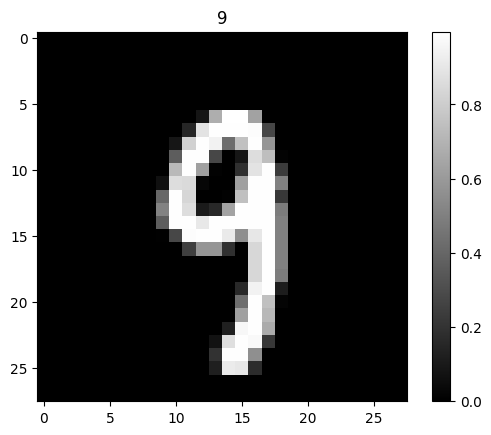

In [5]:
# seeing what I just did
if 1:
    xxx, yyy = train
    print(xxx.shape)

    # choosing a random data
    n = np.random.randint(xxx.shape[0])
    print(f"{n}th data")
    
    # showint them using matplotlib
    plt.imshow(xxx[n]/255.0, cmap="gray")
    # plt.imshow(xxx[n]/255.0)
    plt.colorbar()
    plt.title(f"{yyy[n]}")
    plt.show()

In [6]:
# building the model
a_simple_nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Rescaling((1/128)),
    # keras.layers.Lambda(lambda x: x/128),
    keras.layers.Dense(units=192, activation='gelu'),
    keras.layers.Dense(units=256, activation='gelu'),
    keras.layers.Dense(units=128, activation='gelu'),
    keras.layers.Dense(units=10)
])
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
a_simple_nn_model.compile(optimizer='adam',
                          loss=loss_function,
                          metrics=['accuracy'])

In [7]:
# training
a_simple_nn_model.fit(train[0], train[1], epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1913 - accuracy: 0.9425
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0865 - accuracy: 0.9735
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9808
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9838


41500th data
[6]


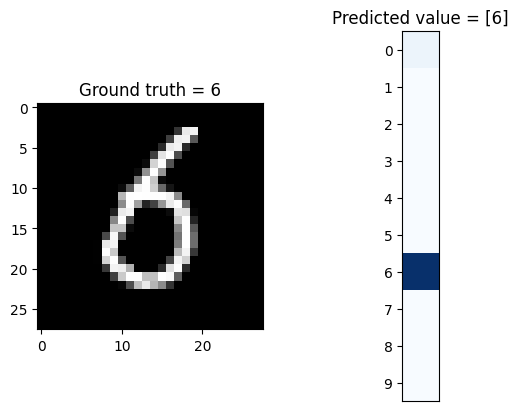

In [8]:
def check_random(data, model = a_simple_nn_model):
    n = np.random.randint(data[0].shape[0])

    f, (f1, f2) = plt.subplots(1,2)
    x, y = nth_case(train, n)
    print(f"{n}th data")
    f1.imshow(x[0], cmap='gray')
    f1.set_title(f"Ground truth = {y}")

    y_pred = model(x)
    y_pred = tf.keras.activations.softmax(y_pred)
    y = tf.reshape(y_pred, shape=(-1, 1))
    f2.imshow(y, cmap='Blues')
    f2.get_xaxis().set_ticks([])
    f2.get_yaxis().set_ticks(np.arange(10))
    f2.set_title("Prediction map")
    
    y = np.argmax(y, axis=0)
    print(y)
    f2.set_title(f"Predicted value = {y}")

if 1:
    check_random(train)

In [9]:
# evaluation
a_simple_nn_model.evaluate(test[0], test[1], verbose=2)

313/313 - 0s - loss: 0.0782 - accuracy: 0.9772 - 483ms/epoch - 2ms/step


[0.07824181765317917, 0.9771999716758728]

In [10]:
# saving the model somewhere
a_simple_nn_model.save("mnist_pretrained_model.keras")

In [11]:
# saving in the tf format
a_simple_nn_model.save("mnist_model.tf", save_format='tf')

INFO:tensorflow:Assets written to: mnist_model.tf/assets


INFO:tensorflow:Assets written to: mnist_model.tf/assets


6630th data
[0]


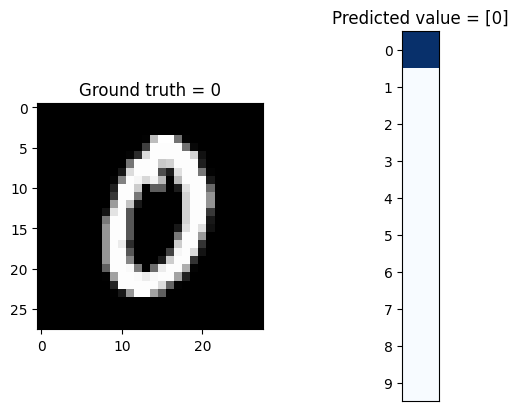

In [12]:
if 1:
    check_random(test)

1
0


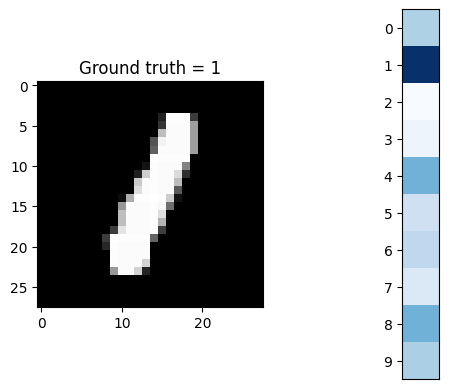

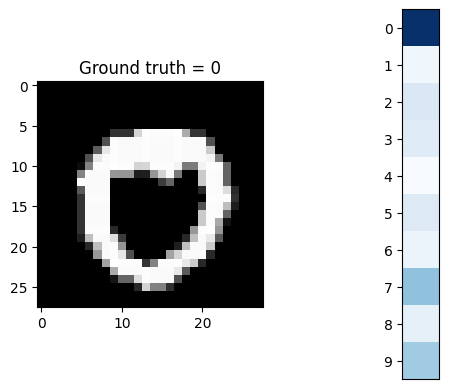

In [13]:
questionable_train_cases = [42093, 48218]
# 48218th train data looks like heart
questionable_test_cases = []

for case in questionable_train_cases:
    f, (f1, f2) = plt.subplots(1,2)
    x, y = nth_case(train, case)
    print(y)
    f1.imshow(x[0], cmap='gray')
    f1.set_title(f"Ground truth = {y}")

    y_pred = a_simple_nn_model(x)
    y = tf.reshape(y_pred, shape=(-1, 1))
    f2.imshow(y, cmap='Blues')
    f2.get_xaxis().set_ticks([])
    f2.get_yaxis().set_ticks(np.arange(10))
    
    
# for case in questionable_test_cases:
#     x, t = test[case]

In [14]:
# loading the saved model
loaded_model = keras.models.load_model("mnist_pretrained_model.keras")

5516th data
[1]


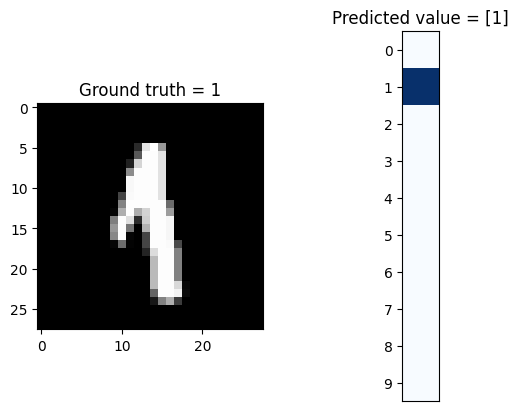

In [15]:
check_random(test, model=loaded_model)

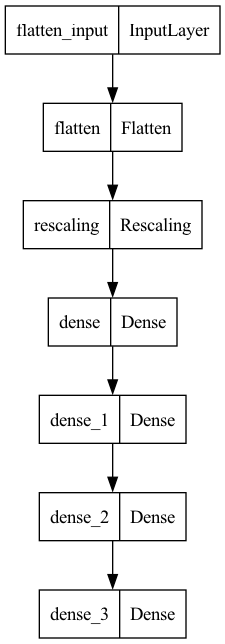

In [16]:
keras.utils.plot_model(loaded_model)